In [4]:
#1) Gerar o gráfico das principais funções vistas em aula (retangular, triangular, Gaussiana, 
# função impulso, função pente, diferenciação, combinação linear, escala) e suas transformadas de Fourier

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Função Retangular
def retangular(t, a):
    return np.where(np.logical_and(t >= -a/2, t < a/2), 1, 0)

# Função Triangular
def triangular(t, a):
    return np.where(np.logical_and(t >= -a/2, t < 0), t/a + 0.5, np.where(np.logical_and(t >= 0, t < a/2), -t/a + 0.5, 0))

# Função Gaussiana
def gaussiana(t, sigma):
    return np.exp(-t**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

# Função Impulso (Delta de Dirac)
def impulso(t):
    return np.where(t == 0, np.inf, 0)

# Função Pente
def pente(t, T):
    return np.where(np.abs(t) % T < 1e-10, 1, 0)

# Derivada de uma Função (Diferenciação)
def derivada(f, t):
    dt = t[1] - t[0]
    return np.gradient(f, dt)

# Combinação Linear
def combinacao_linear(a, t, funcs, coeffs):
    result = np.zeros_like(t)
    for f, c in zip(funcs, coeffs):
        if f in [retangular, triangular, gaussiana, pente]:
            result += c * f(t, a)
        elif f is impulso:
            result += c * f(t)
        elif f is derivada:
            result += c * f(np.sin(t), t)
        elif f in [lambda t: np.sin(t), lambda t: np.cos(t)]:
            result += c * f(t)
        else:
            result += c * f(t)
    return result

# Escala
def escala(t, a):
    return t * a

In [6]:
# Gerar tempo
t = np.linspace(-10, 10, 1000)

# Parâmetros
a = 4
sigma = 1.0
T = 2

# Funções para combinação linear
funcs = [retangular, triangular, gaussiana, impulso, pente, lambda t: derivada(np.sin(t), t), lambda t: np.sin(t), lambda t: np.cos(t)]
coeffs = [1, 1, 1, 1, 1, 1, 1, 1]

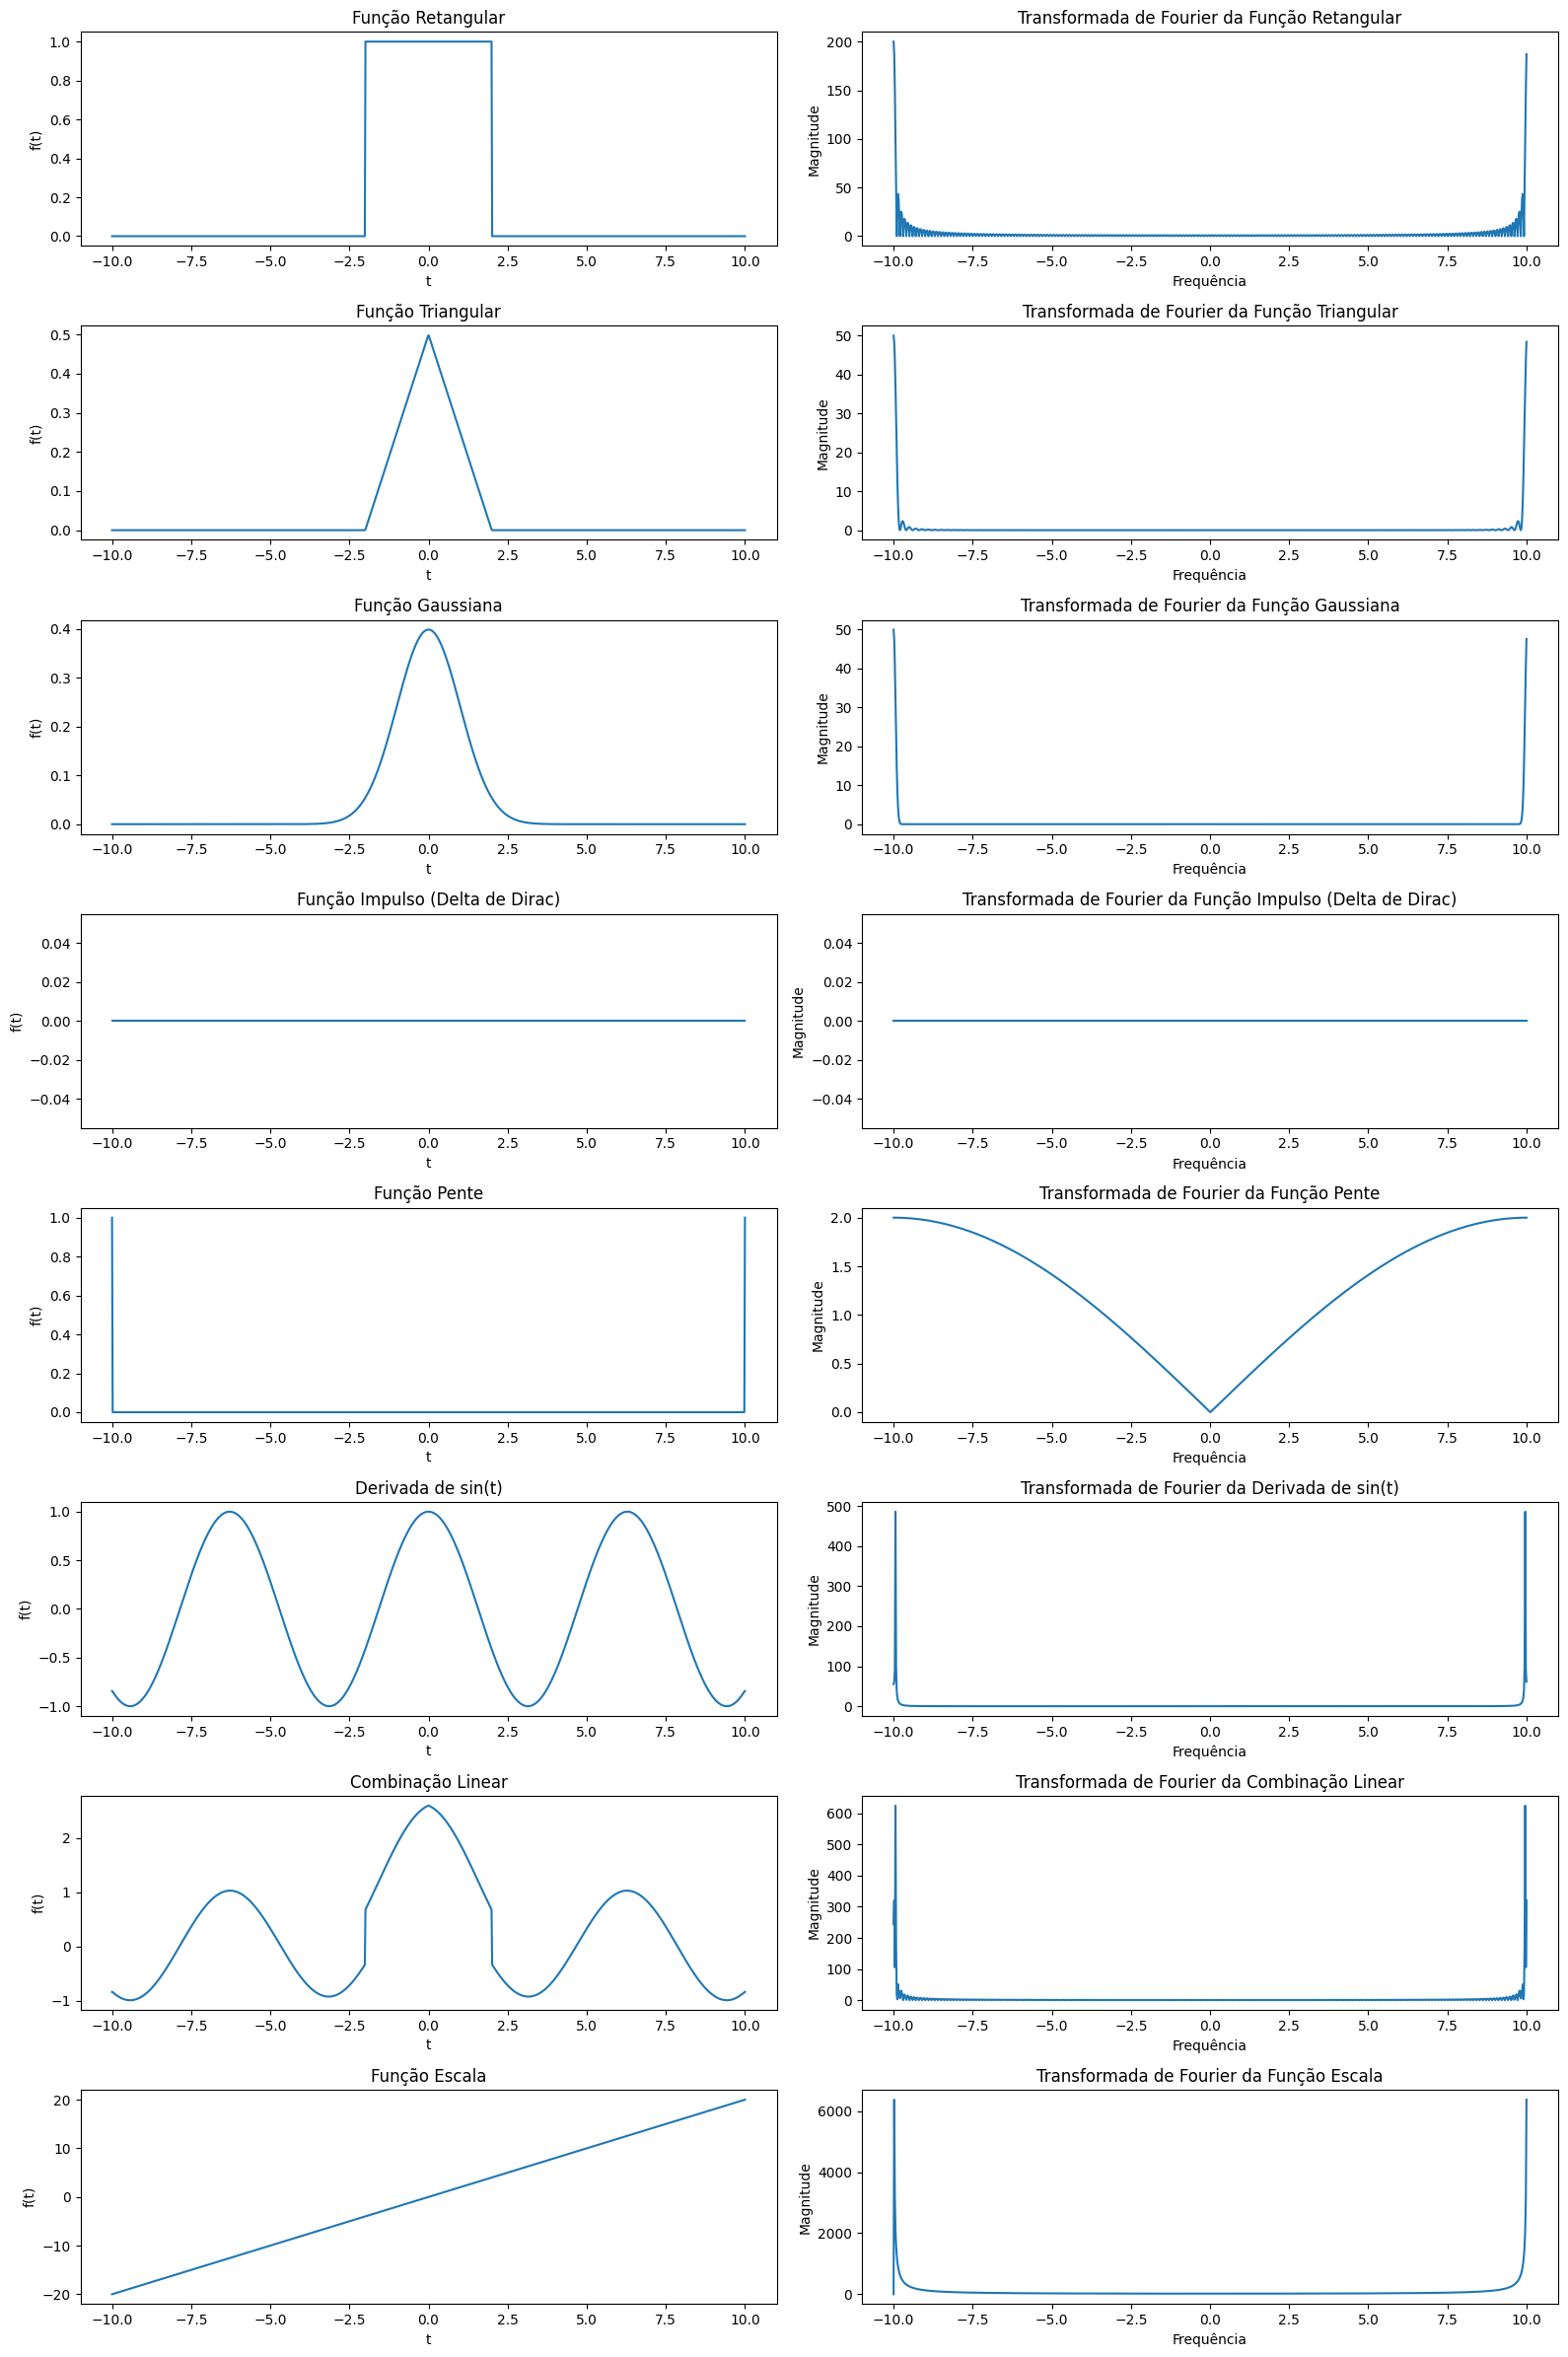

In [7]:
plt.figure(figsize=(16, 24))

plt.subplot(8, 2, 1)
plt.plot(t, retangular(t, a))
plt.title("Função Retangular")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(8, 2, 2)
plt.plot(t, np.abs(fft(retangular(t, a))))
plt.title("Transformada de Fourier da Função Retangular")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")

plt.subplot(8, 2, 3)
plt.plot(t, triangular(t, a))
plt.title("Função Triangular")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(8, 2, 4)
plt.plot(t, np.abs(fft(triangular(t, a))))
plt.title("Transformada de Fourier da Função Triangular")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")

plt.subplot(8, 2, 5)
plt.plot(t, gaussiana(t, sigma))
plt.title("Função Gaussiana")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(8, 2, 6)
plt.plot(t, np.abs(fft(gaussiana(t, sigma))))
plt.title("Transformada de Fourier da Função Gaussiana")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")

plt.subplot(8, 2, 7)
plt.plot(t, impulso(t))
plt.title("Função Impulso (Delta de Dirac)")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(8, 2, 8)
plt.plot(t, np.abs(fft(impulso(t))))
plt.title("Transformada de Fourier da Função Impulso (Delta de Dirac)")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")

plt.subplot(8, 2, 9)
plt.plot(t, pente(t, T))
plt.title("Função Pente")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(8, 2, 10)
plt.plot(t, np.abs(fft(pente(t, T))))
plt.title("Transformada de Fourier da Função Pente")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")

plt.subplot(8, 2, 11)
plt.plot(t, derivada(np.sin(t), t))
plt.title("Derivada de sin(t)")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(8, 2, 12)
plt.plot(t, np.abs(fft(derivada(np.sin(t), t))))
plt.title("Transformada de Fourier da Derivada de sin(t)")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")

plt.subplot(8, 2, 13)
plt.plot(t, combinacao_linear(a, t, funcs[:6], coeffs[:6]))
plt.title("Combinação Linear")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(8, 2, 14)
plt.plot(t, np.abs(fft(combinacao_linear(a, t, funcs[:6], coeffs[:6]))))
plt.title("Transformada de Fourier da Combinação Linear")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")

plt.subplot(8, 2, 15)
plt.plot(t, escala(t, 2))
plt.title("Função Escala")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.subplot(8, 2, 16)
plt.plot(t, np.abs(fft(escala(t, 2))))
plt.title("Transformada de Fourier da Função Escala")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()